In [1]:
# To fine-tune a transformer for our dataset, we need a dataset and a pretrained model
!pip install accelerate -U
!pip install datasets transformers


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Amount of examples: 5120
Sample data: 
image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x77FFC77B98D0> size: (128, 128) class: 2
image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x77FFC7803340> size: (128, 128) class: 0
image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x77FFC7803220> size: (128, 128) class: 3
image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x77FFC7803340> size: (128, 128) class: 3
image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x77FFC7803220> size: (128, 128) class: 2
Dataset({
    features: ['image', 'label'],
    num_rows: 5120
})


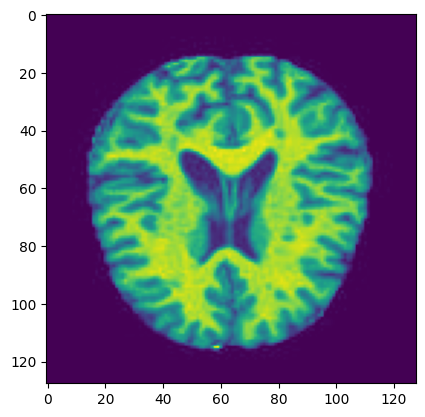

Label: 2


In [2]:

# We load the dataset
from datasets import load_dataset
dataset = load_dataset("Falah/Alzheimer_MRI", split="train")

# And check it out
print(f"Amount of examples: {len(dataset)}")
print("Sample data: ")
for i in range(5):
  example = dataset[i]
  print(f"image: {example['image']} size: {example['image'].size} class: {example['label']}")

print(dataset)

# Let's also show an image.
import matplotlib.pyplot as plt
image = dataset[0]['image']
plt.imshow(image)
plt.show()

# Is it alzheimer?
print(f"Label: {dataset[0]['label']}")

But what is 2?
Let's check the hugginface dataset link:
https://huggingface.co/datasets/Falah/Alzheimer_MRI

```
dataset_info:
  features:
    - name: image
      dtype: image
    - name: label
      dtype:
        class_label:
          names:
            '0': Mild_Demented
            '1': Moderate_Demented
            '2': Non_Demented
            '3': Very_Mild_Demented
  splits:
    - name: train
      num_bytes: 22560791.2
      num_examples: 5120
    - name: test
      num_bytes: 5637447.08
      num_examples: 1280
  download_size: 28289848
  dataset_size: 28198238.28
license: apache-2.0
task_categories:
  - image-classification
language:
  - en
tags:
  - medical
pretty_name: Alzheimer_MRI Disease Classification Dataset
size_categories:
  - 1K<n<10K
```



There we go:


            '0': Mild_Demented
            '1': Moderate_Demented
            '2': Non_Demented
            '3': Very_Mild_Demented

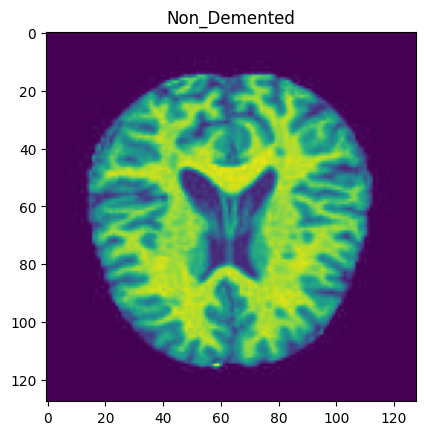

In [3]:
# Let's create a python dictionary for the id to label mapping

id2label = {0: "Mild_Demented", 1: "Moderate_Demented", 2: "Non_Demented", 3: "Very_Mild_Demented"}

# Let's also create a python dictionary for the label to id mapping, just in case
label2id = {v: k for k, v in id2label.items()}

# Let's replot and show the label
image = dataset[0]['image']
plt.imshow(image)
plt.title(id2label[dataset[0]['label']])
plt.show()


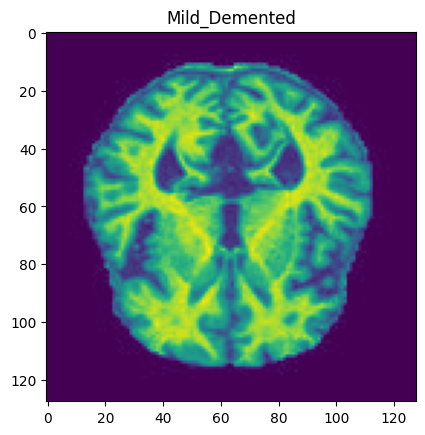

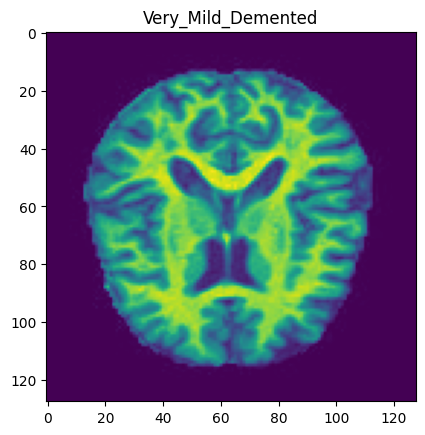

In [4]:
# But what about dementia?

image = dataset[1]['image']
plt.imshow(image)
plt.title(id2label[dataset[1]['label']])
plt.show()

image = dataset[2]['image']
plt.imshow(image)
plt.title(id2label[dataset[2]['label']])
plt.show()


I'm not a medicine specialist.

So lets use an AI model to assist us for new MRI images
and inspect its knowledge.

In [5]:
# First we transform the image to RGB

from transformers import ViTImageProcessor


image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

image0Gray = dataset[0]['image']

image0RGB = image0Gray.convert("RGB")

print(image0RGB)
pixel_values = image_processor(images=image0RGB, return_tensors="pt").pixel_values

print(pixel_values)
print(pixel_values.shape)

<PIL.Image.Image image mode=RGB size=128x128 at 0x77FEBB6A7EE0>
tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])
torch.Size([1, 3, 22

In [6]:
from transformers import ViTFeatureExtractor

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

print(feature_extractor)

ViTFeatureExtractor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:
from transformers import ViTModel

model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

print(model)


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [8]:
from transformers import ViTConfig

config = ViTConfig.from_pretrained("google/vit-base-patch16-224-in21k")

print(config)

print(config.num_labels)

config.num_labels = 4

print(config.num_labels)


ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.41.2"
}

2
4


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [9]:
!pip install evaluate

In [9]:
import os
from transformers import ViTImageProcessor, ViTForImageClassification, TrainingArguments, Trainer, default_data_collator
from datasets import load_dataset
import numpy as np
import evaluate, torch

# Set environment variable for better error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Load the dataset
dataset = load_dataset("Falah/Alzheimer_MRI", split="train")

# Initialize the image processor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

print(dataset)

# Transform function to preprocess images and include labels
def transform(example_batch):
    # Debugging: Print the keys of the example_batch
    print("Example batch keys:", example_batch.keys())

    # Process the images only if 'image' key exists
    if 'image' in example_batch:
        # Take a list of PIL images and turn them to pixel values
        inputs = processor([img.convert('RGB') for img in example_batch['image']], return_tensors='pt')
        # Include the labels
        inputs['labels'] = torch.tensor(example_batch['label'], dtype=torch.long)
        return inputs

    return example_batch  # Return the example batch as is if 'image' key is not present

# Apply the transform function to the dataset using map instead of with_transform
prepared_dataset = dataset.map(transform, batched=True)

# Load the model
model_directory = "google/vit-base-patch16-224-in21k"
model = ViTForImageClassification.from_pretrained(model_directory, num_labels=4)

# Initialize the metric
metric = evaluate.load("accuracy")

# Compute metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Updated the deprecated argument
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',  # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer with default_data_collator
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_dataset,
    eval_dataset=prepared_dataset,  # Normally you would have a separate validation set
    data_collator=default_data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Dataset({
    features: ['image', 'label'],
    num_rows: 5120
})


Map:   0%|          | 0/5120 [00:00<?, ? examples/s]

Example batch keys: KeysView({'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A0C40>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A09D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A0C70>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A13C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A0E50>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A0DC0>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A1120>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD00A11B0>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD83B3670>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD83B3100>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78ACD83B3340>, <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x78A

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
